C:\Users\Admin\AppData\Local\Temp\ipykernel_12932\2131747467.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
  edges.sort(key=lambda e: abs(image[e[0] // width, e[0] % width] - image[e[1] // width, e[1] % width]))


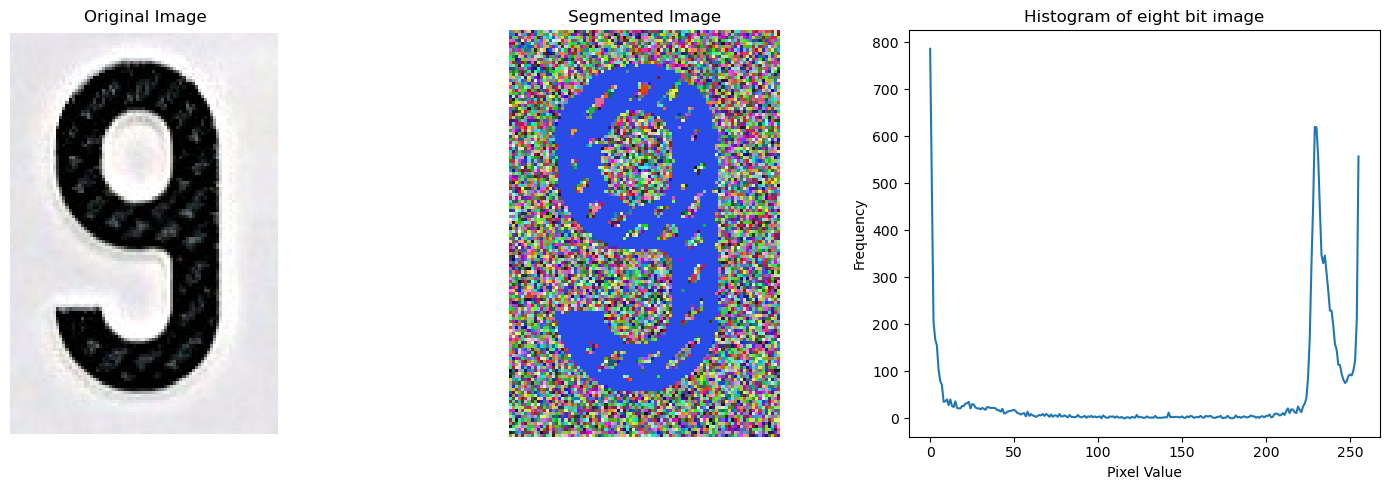

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


# Load the image
image = cv2.imread('numplate4.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



def segment_image(image, threshold):
    height, width = image.shape[:2]
    segments = np.arange(height * width).reshape((height, width))

    edges = edge_sorting(image)

    for ni, nj in edges:
        if segments[ni // width, ni % width] != segments[nj // width, nj % width] and image[ni // width, ni % width] <= threshold:
            merge_segments(segments, segments[ni // width, ni % width], segments[nj // width, nj % width])

    return segments

def edge_sorting(image):
    height, width = image.shape[:2]
    edges = []

    for row in range(height - 1):
        for col in range(width):
            edges.append((row * width + col, (row + 1) * width + col))

    for row in range(height):
        for col in range(width - 1):
            edges.append((row * width + col, row * width + col + 1))

    edges.sort(key=lambda e: abs(image[e[0] // width, e[0] % width] - image[e[1] // width, e[1] % width]))

    return edges

def merge_segments(segments, segment_i, segment_j):
    segments[segments == segment_j] = segment_i
   
 # Extract the eight-bit image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the eight-bit image
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


 # Perform edge-based segmentation
threshold = 13  # Set the threshold value
segments = segment_image(gray_image, threshold)
   
 # Create a mask for visualization
mask = np.zeros(image_rgb.shape, dtype=np.uint8)

# Assign random colors to each segment
colors = []
for _ in range(np.max(segments) + 1):
    color = np.random.randint(0, 255, size=3)
    colors.append(color)

# Fill the mask with segment colors
for segment_id in np.unique(segments):
    mask[segments == segment_id] = colors[segment_id]


# Display the original image, segmented image and histogram of eight bit image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask)
ax[1].set_title('Segmented Image')
ax[1].axis('off')

ax[2].plot(hist)
ax[2].set_title('Histogram of eight bit image')
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

